In [146]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [147]:
def normal(a, sigma):
    def inner():
        return max(0.0, random.gauss(a, sigma))
    return inner


def avg(inp):
    return np.array([np.mean(item) for item in inp])

In [148]:
slot_machines = [
    normal(1, 1),
    normal(3, 5),
    normal(4, 10),
    normal(3, 1)
] * 10 + [
    normal(0.5, 500)
]

In [149]:
iterations = 100000
c = 20

results_avg_per_machine = np.zeros(len(slot_machines))
results_play_count_per_machine = np.ones(len(slot_machines))
results_total = list()


def play(i):
    res = slot_machines[i]()
    sn = results_avg_per_machine[i]
    n = results_play_count_per_machine[i]
    results_avg_per_machine[i] = (n * sn + res) / (n + 1)
    results_play_count_per_machine[i] += 1
    results_total.append(res)
    return res


for i in range(min(len(slot_machines), iterations)):
    play(i)


for iteration in range(iterations - len(slot_machines)):
    xj = results_avg_per_machine
    n = len(results_total)
    nj = results_play_count_per_machine
    x = xj + c * np.sqrt(np.log(n) / nj)
    i = np.argmax(x)
    play(i)


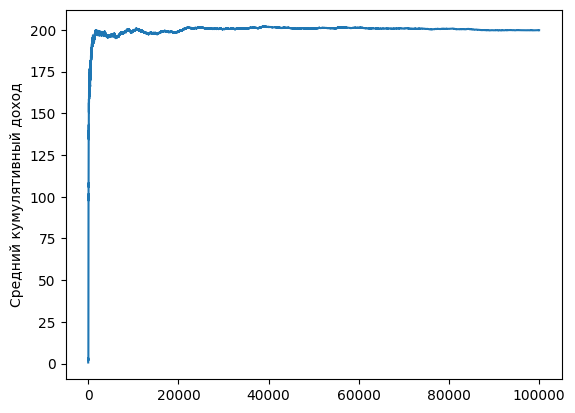

In [150]:
cumulative_avg = np.cumsum(results_total) / np.arange(1, len(results_total) + 1)

plt.plot(cumulative_avg)
plt.ylabel('Средний кумулятивный доход')
plt.show()